<h1><b>MACHINE LEARNING AND STATISTICS: REGRESSION</b></h1>

<h2>GOALS OF THIS PROJECT</h2>
    <ol>
    <li>Show how scipy can be used to perform linear regression.</li>
    <li>Find an appropriate data set online or elsewhere on which to
perform linear regression.
</li>
    <li>Demonstrate how to perform linear regression on the data set.
</li>
</ol>

<h2 align = "center">1. PERFORMING LINEAR REGRESSION WITH SCIPY</h2>

In [9]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as ss

rng = np.random.default_rng()

In [10]:
x = rng.random(10)

y = 1.6*x + rng.random(10)

In [11]:
res = stats.linregress(x, y)

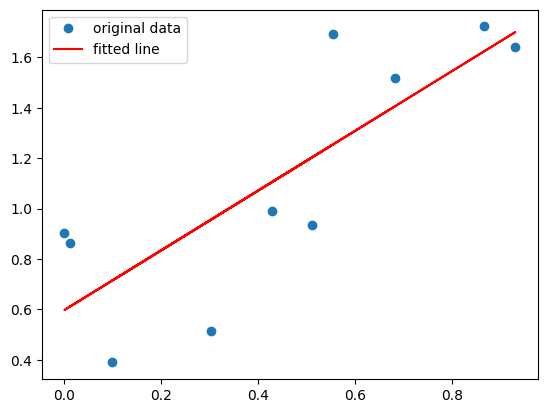

In [12]:
plt.plot(x, y, 'o', label='original data')

plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

plt.legend()

plt.show()

<h2 align = "center">2. EXPLAINING THE DATA SET USED</h2>

<h2 align = "center">3. PERFORMING LINEAR REGRESSION THE DATA SET</h2>